In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
n = 20
delta = 0.1
gamma = 0.9

angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
Phi = np.concatenate([np.expand_dims(np.sin(angles), 1), 
                      np.expand_dims(np.cos(angles), 1), np.ones((n,1))], axis = 1) 



In [3]:
import sys
sys.path.append("/Users/davidbrandfonbrener/Code/")
from td.envs import environment, P_matrices

In [4]:
P = P_matrices.build_cyclic_P(n, delta)

R_mat = np.zeros_like(P)
R_mat[0, 1] = 1
env = environment.MRP(gamma, P, R_mat)


V_star = np.zeros(n)
for i in range(0, n, 2):
    V_star[i] = 1
#env = environment.MRP(args.gamma, P, V_star=V_star)

/Users/davidbrandfonbrener/Code/td/envs/environment.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  self.mu = np.array(vecs[:, np.argmax(vals)], dtype=float)


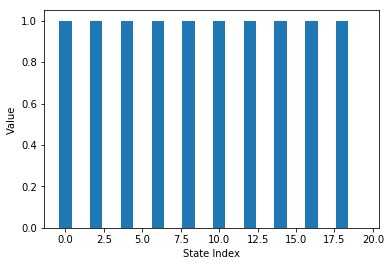

In [5]:
plt.bar(range(V_star.shape[0]), V_star)
plt.xlabel("State Index")
plt.ylabel("Value")
plt.show()

/Users/davidbrandfonbrener/Code/td/envs/environment.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  self.mu = np.array(vecs[:, np.argmax(vals)], dtype=float)


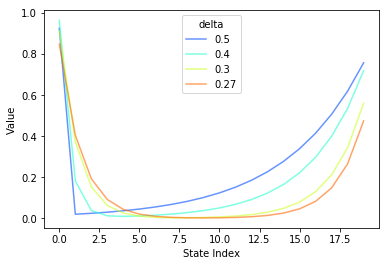

In [36]:
ds = [0.5, 0.4, 0.3, 0.27]
colors = plt.cm.jet(np.linspace(0.2,0.8,len(ds)))

for i,d in enumerate(ds):
    P = P_matrices.build_cyclic_P(n, d)
    R_mat = np.zeros_like(P)
    R_mat[0, 1] = 1
    env = environment.MRP(gamma, P, R_mat)
    
    plt.plot(range(env.V_star.shape[0]), env.V_star, color = colors[i], alpha = 0.6, label = str(d))
    plt.xlabel("State Index")
    plt.ylabel("Value")
    plt.legend(title = "delta")

plt.show()

In [16]:
P_grid = P_matrices.constant_gridworld(5, 0.3, 0.1, 0.1, 0.3, 0.2)

In [17]:
R_mat = np.zeros_like(P_grid)
R_mat[:, -1] = 1
env = environment.MRP(gamma, P_grid, R_mat)

/Users/davidbrandfonbrener/Code/td/envs/environment.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  self.mu = np.array(vecs[:, np.argmax(vals)], dtype=float)


In [18]:
np.sum(P_grid, axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

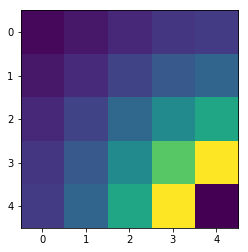

In [19]:
plt.imshow(np.reshape(env.V_star, (5,5)))